In [75]:
# from google.colab import drive
# drive.mount('/content/drive')

# Redes Neurais: Autoencoders
* Redução de Dimensionalidade
* Problemas não supervisionados (clusterização)

Autor:
- Larissa Ionafa RA:1903166
- Roberta Yumi Romero Takahashi RA:1903220

In [76]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [77]:
pd.set_option('display.max_columns', 25)

In [78]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Contexto & Entendimento da base

O [Medium](https://medium.com/) é uma plataforma para lermos textos de diversos assuntos diferentes. É uma boa fonte para nos atualizarmos ou buscarmos uma introdução a um tema.

Neste laboratório, acessaremos uma base composta por um conjunto de artigos do medium e buscaremos separar os tipos de textos, conforme seus temas.

In [79]:
df = pd.read_csv("./medium_articles.csv")
df.tail()

,title,text,url,authors,timestamp,tags
192363,Why do you need a cleaning service?,What could be more important than having a tid...,https://medium.com/@ozneedcleaningau/why-do-yo...,[],2021-11-16 08:17:08.950000+00:00,"['Cleaning', 'Cleaning Services', 'Cleaning Co..."
192364,Daily cleaning and maintenance of bedding,Daily cleaning and maintenance of bedding\n\nW...,https://medium.com/@a198blwt/daily-cleaning-an...,[],2021-11-16 05:27:05.359000+00:00,"['Bedding', 'Cleaning', 'Maintain']"
192365,Beneficial Advice on Bond Cleaning!,The most important chore at the end is bond cl...,https://medium.com/@princegohil/beneficial-adv...,['Prince Shrawan'],2021-11-26 08:20:27.660000+00:00,"['Cleaning', 'End Of Lease Cleaning', 'Cleaners']"
192366,How I Learned Romanian in 37 Easy Steps,How I Learned Romanian in 37 Easy Steps\n\nHey...,https://medium.com/@lifeinromania/how-i-learne...,['Sam Ursu'],2017-11-27 08:09:19.025000+00:00,"['Romania', 'Language Learning', 'Storyofmylife']"
192367,Trying Pimsleur Cantonese in Hong Kong,"Over the past few years, I’ve heard a number o...",https://medium.com/toshuo/trying-pimsleur-cant...,[],2017-06-15 02:24:35.659000+00:00,"['Hong Kong', 'Cantonese', 'Language Learning'..."


In [80]:
temas = []

for i in range(0,len(df)):
  for tag in df['tags'][i].replace("'",'').replace('[','').replace(']','').split(", "): #Precisei corrigir o texto e usar o split
    temas.append(tag)
len(temas)

880602

In [81]:
temas[0:10]

['Mental Health',
 'Health',
 'Psychology',
 'Science',
 'Neuroscience',
 'Mental Health',
 'Coronavirus',
 'Science',
 'Psychology',
 'Neuroscience']

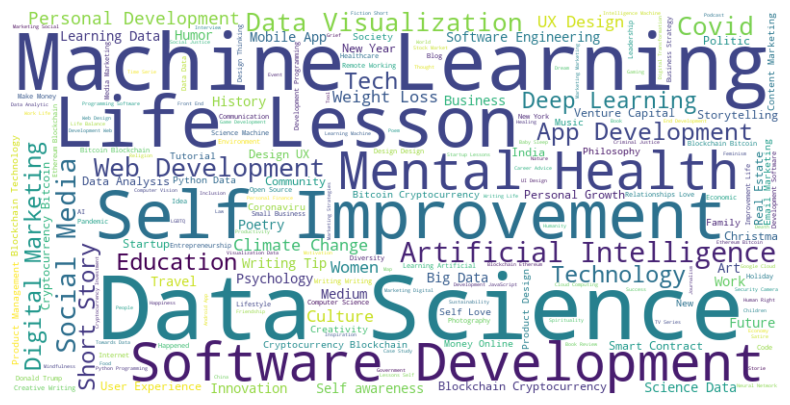

In [82]:
#Principais temas, ilustrado num mapa de palavras
from wordcloud import WordCloud

# Converta a lista de palavras em uma única string
texto = " ".join(temas)

# Crie um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Plote a nuvem de palavras usando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativa os eixos
plt.show()

In [83]:
len(set(temas))

78639

In [84]:
from collections import Counter

contagem = Counter(temas)
print(contagem)

Counter({'Blockchain': 7534, 'Data Science': 7410, 'Technology': 6384, 'Programming': 6364, 'Poetry': 6336, 'Cryptocurrency': 6245, 'Machine Learning': 6055, 'Life': 5954, 'Bitcoin': 5800, 'Writing': 5115, 'Politics': 5074, 'Startup': 4974, 'Life Lessons': 4807, 'Self Improvement': 4267, 'Covid 19': 4176, 'Software Development': 3980, 'Love': 3978, 'Python': 3943, 'Business': 3722, 'Health': 3650, 'Mental Health': 3583, 'JavaScript': 3487, 'Relationships': 3377, 'Education': 3269, 'Artificial Intelligence': 3222, 'Culture': 3027, 'Design': 2932, 'Self': 2876, 'Marketing': 2791, 'Entrepreneurship': 2782, 'Ethereum': 2731, 'Music': 2524, 'Productivity': 2510, 'Web Development': 2498, 'History': 2418, 'Humor': 2386, 'Data Visualization': 2332, 'Leadership': 2317, 'Social Media': 2284, 'Psychology': 2200, 'Travel': 2138, 'Fiction': 2128, 'Creativity': 2069, 'Coronavirus': 2043, 'Parenting': 1983, 'Crypto': 1889, 'Science': 1879, 'Tech': 1850, 'UX': 1818, 'Short Story': 1815, 'Money': 1797,

In [85]:
# Converta o objeto Counter em um DataFrame do pandas
contador = pd.DataFrame.from_dict(contagem, orient='index', columns=['Contagem'])
contador = contador.sort_values(by='Contagem',ascending=False).reset_index()
contador.head(30)

,index,Contagem
0,Blockchain,7534
1,Data Science,7410
2,Technology,6384
3,Programming,6364
4,Poetry,6336
5,Cryptocurrency,6245
6,Machine Learning,6055
7,Life,5954
8,Bitcoin,5800
9,Writing,5115


In [86]:
top50_temas = list(contador['index'][0:50])

for topico in top50_temas: #Para cada um dos top 50 temas
  aux = [] #Criando uma lista vazia
  for i in range(0,len(df)): #Para cada linha da tabela
    if topico in df['tags'][i]: #Se o topico fizer parte da tag, vale 1
      aux.append(1)
    else:
      aux.append(0) #Caso contrario, vale 0
  df[topico] = aux #Criando uma coluna para cada topico

In [87]:
df.head()

,title,text,url,authors,timestamp,tags,Blockchain,Data Science,Technology,Programming,Poetry,Cryptocurrency,...,Social Media,Psychology,Travel,Fiction,Creativity,Coronavirus,Parenting,Crypto,Science,Tech,UX,Short Story
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0


In [88]:
import plotly.express as px

#Calculando a correlação e mantendo apenas baixas correlacoes
corr = df[top50_temas].corr(method='pearson', min_periods=1)
for col in top50_temas:
  corr = corr.loc[((corr[col] > -0.10) & (corr[col] < 0.10)) | (corr[col] == 1)]

corr = corr[list(corr.index)]

mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)
fig = px.imshow(corr, #Fonte de dados é a tabela de correlação
                text_auto=True, #Inseri o nome dos dados
                color_continuous_scale=px.colors.diverging.RdBu, #As cores serão de azul (1) a vermelho (-1)
                zmin=-1,zmax=1 #defino que o minimo é -1 e o maximo é 1
                )


fig.update_layout(
    title_text='Correlações entre variáveis numéricas', #titulo
    title_x=0.5,  #Titulo centralizado
    width=700, #largura
    height=700, #altura
    xaxis_showgrid=False, #Para omitir as linhas de grade no eixo x
    yaxis_showgrid=False, #Para omitir as linhas de grade no eixo y
    template='plotly_white' #template
)

fig.show()

In [89]:
contador.loc[(contador['index'].isin(list(corr.index)))]

,index,Contagem
10,Politics,5074
23,Education,3269
25,Culture,3027
31,Music,2524
34,History,2418
35,Humor,2386
37,Leadership,2317
40,Travel,2138
44,Parenting,1983


# Exemplo prático

Vamos montar um projeto para separar os temas de Parenting, Travel e Leadership e Humor.

In [90]:
df.columns

Index(['title', 'text', 'url', 'authors', 'timestamp', 'tags', 'Blockchain',
       'Data Science', 'Technology', 'Programming', 'Poetry', 'Cryptocurrency',
       'Machine Learning', 'Life', 'Bitcoin', 'Writing', 'Politics', 'Startup',
       'Life Lessons', 'Self Improvement', 'Covid 19', 'Software Development',
       'Love', 'Python', 'Business', 'Health', 'Mental Health', 'JavaScript',
       'Relationships', 'Education', 'Artificial Intelligence', 'Culture',
       'Design', 'Self', 'Marketing', 'Entrepreneurship', 'Ethereum', 'Music',
       'Productivity', 'Web Development', 'History', 'Humor',
       'Data Visualization', 'Leadership', 'Social Media', 'Psychology',
       'Travel', 'Fiction', 'Creativity', 'Coronavirus', 'Parenting', 'Crypto',
       'Science', 'Tech', 'UX', 'Short Story'],
      dtype='object')

In [91]:
df_modelagem_exemplo = df.loc[((df['Humor'] == 1) | (df['Leadership'] == 1) | (df['Travel'] == 1) | (df['Parenting'] == 1)), ['title', 'text', 'url', 'authors', 'timestamp', 'tags']]
df_modelagem_exemplo.reset_index(drop=True, inplace=True)
df_modelagem_exemplo.tail()

,title,text,url,authors,timestamp,tags
9729,Website Review: HotelPower.com: Wanna Go For a...,There are a few things in this world that link...,https://gobsofreviews.com/website-review-hotel...,['Luke Goldstein'],2016-12-02 05:34:31.894000+00:00,"['Reviews', 'Travel', 'Hotels']"
9730,Are there any 4 or 5 Star Hotels in Andaman?,"The Andaman Islands, a conglomerate of pristin...",https://medium.com/@travelagentandaman/are-the...,['Travelagent Andaman'],2017-11-27 13:30:51.963000+00:00,"['Travel', 'Hotel', 'Resort']"
9731,Pepper Heads to Hospitality: Humanoid robot he...,Whether people are traveling for pleasure or b...,https://medium.com/@softbankrobotics/pepper-he...,['Softbank Robotics Us'],2017-11-21 18:09:46.671000+00:00,"['Travel', 'Hospitality', 'Hotel', 'Robotics',..."
9732,A Mean Mum’s Guide to Chores,Mean Mum Series Part 2\n\nPhoto by The Creativ...,https://medium.com/@katiadixon/a-mean-mums-gui...,['Katia Dixon'],2021-11-15 15:17:34.696000+00:00,"['Parenting', 'Blog', 'Responsibility', 'Famil..."
9733,Clean School Shoes Stink? It’s Enough to Read ...,Clean School Shoes Stink? It’s Enough to Read ...,https://medium.com/@akidstar/clean-school-shoe...,[],2021-11-16 03:16:59.285000+00:00,"['Baby Care', 'Cleaning', 'Parenting']"


## Criando as variaveis Explicativas

Para análise de textos, as variáveis explicativas são as palavras (ou conjuntos de palavras) dos textos. Assim como em outros projetos de Ciência de Dados, há a necessidade de tratamentos dos dados e transformações.

**Tratamentos**:
1. Remoção de pontuações e símbolos;
2. Padronização: manter os textos minúsculos, por exemplo.
3. Remoção de stopwords: stopwords são termos que não agregam no modelo. Por exemplo, uma coluna ID não seria utilizada num modelo. Textos que não agregam também não, como "e", "ou", "boa tarde", entre outros.
4. Normalização léxica: stemming/lematização é quando convertemos a palavra em sua forma base. Por exemplo: andarei, andaria -> andar. querido, querida -> querid. Em outras palavras, removemos conjugações verbais, gêneros das palavras.

In [92]:
# Exemplo
df_modelagem_exemplo['text'][9732]

'Mean Mum Series Part 2\n\nPhoto by The Creative Exchange on Unsplash\n\nWhen you’re a Mean Mum you don’t cater to kids and clean up after them. Oh hell no! The you make a mess, you better be cleaning it up rule is always in effect. Being a parent doesn’t mean the adults take care of it all. Family means you all work together to get it done so you can have family time together. I’m going to let you in on a little secret — kids are FULLY CAPABLE of being responsible. Yes they sometimes need reminders. Yes they won’t always do it properly, but they are capable of helping around the house. And one more secret… they are capable of doing it without a reward!\n\nFrom the time a baby can start to sit up and grip a toy, they can start with minor chores. Some of you might be saying, well she’s lost her mind on that one, but it’s as simple as holding the toy bin by a baby and letting them drop the toy in and a moment of cheering for putting it away. As they grow the responsibilities continue. Wh

In [93]:
# Removendo \n e mantendo todos os termos minusculos
exemplo = df_modelagem_exemplo['text'][9732].replace("\n"," ").replace("  "," ").lower()
exemplo

'mean mum series part 2 photo by the creative exchange on unsplash when you’re a mean mum you don’t cater to kids and clean up after them. oh hell no! the you make a mess, you better be cleaning it up rule is always in effect. being a parent doesn’t mean the adults take care of it all. family means you all work together to get it done so you can have family time together. i’m going to let you in on a little secret — kids are fully capable of being responsible. yes they sometimes need reminders. yes they won’t always do it properly, but they are capable of helping around the house. and one more secret… they are capable of doing it without a reward! from the time a baby can start to sit up and grip a toy, they can start with minor chores. some of you might be saying, well she’s lost her mind on that one, but it’s as simple as holding the toy bin by a baby and letting them drop the toy in and a moment of cheering for putting it away. as they grow the responsibilities continue. when sittin

In [94]:
exemplo = exemplo.split()
exemplo[0:15]

['mean',
 'mum',
 'series',
 'part',
 '2',
 'photo',
 'by',
 'the',
 'creative',
 'exchange',
 'on',
 'unsplash',
 'when',
 'you’re',
 'a']

In [95]:
import string
string.ascii_letters #Identificando as letras do alfabeto

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [96]:
exemplo = [w for w in exemplo if w.isalpha() and w not in string.ascii_letters]
#isalpha retorna apenas textos. Logo, removemos o '2'
#w not in string.ascii_letters -> não queremos apenas uma letra sozinha. Removemos o 'a' e o 'you're'
exemplo[0:15]

['mean',
 'mum',
 'series',
 'part',
 'photo',
 'by',
 'the',
 'creative',
 'exchange',
 'on',
 'unsplash',
 'when',
 'mean',
 'mum',
 'you']

In [97]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ionaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
from nltk.corpus import stopwords

# lista das stop words
stop_words = stopwords.words('english') #em inglês
print(stop_words[:5])

['i', 'me', 'my', 'myself', 'we']


In [99]:
#Se der erro o download anterior
# stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [100]:
exemplo = [w for w in exemplo if w not in stop_words]
exemplo[0:15]
#Sobrou, por exemplo, o "oh"

['mean',
 'mum',
 'series',
 'part',
 'photo',
 'creative',
 'exchange',
 'unsplash',
 'mean',
 'mum',
 'cater',
 'kids',
 'clean',
 'oh',
 'hell']

In [101]:
from nltk.stem import PorterStemmer

words = [PorterStemmer().stem(w) for w in exemplo]
exemplo[0:15] #Dá para notar potenciais melhorias. Kids poderia ser Kid, por exemplo.

['mean',
 'mum',
 'series',
 'part',
 'photo',
 'creative',
 'exchange',
 'unsplash',
 'mean',
 'mum',
 'cater',
 'kids',
 'clean',
 'oh',
 'hell']

In [102]:
from tqdm import tqdm

# Passo 1: Extraindo as palavras dos textos
words = []
text2 = []
for i in tqdm(range(0,len(df_modelagem_exemplo))):
  texto = df_modelagem_exemplo['text'][i].replace("\n"," ").lower()
  palavras = texto.split()
  palavras = [w for w in palavras if w.isalpha() and w not in string.ascii_letters]
  palavras = [w for w in palavras if w not in stop_words]
  palavras = [PorterStemmer().stem(w) for w in palavras]
  text2.append(" ".join(palavras))
  for termo in palavras:
    words.append(termo)
df_modelagem_exemplo['text2'] = text2

  1%|          | 115/9734 [00:00<01:11, 134.38it/s]

100%|██████████| 9734/9734 [00:51<00:00, 190.22it/s]


In [103]:
print(len(words), len(set(words)))
# Ha 47901 termos/palavras distintos
# Ha 3.117.640 termos/palavras no total

3117640 47901


## Term Frequency and Inverse Document Frequency (TF-IDF)
TF-IDF é uma técnica para quantificar a importância das palavra nos documentos.

**Nomenclatura**:
- t — palavra
- d — documento (conjunto de palavras)
- N — número de documentos

#### TF
TF mede a frequência de uma palavra em um documento. TF depende muito do tamanho do documento e da generalidade da palavra.

$$
TF(t,d)= \frac{\# t \mbox{ em } d}{\#\mbox{ palavras em } d}
$$

#### IDF
IDF mede o quão informativa cada palavra é no conjunto de documentos. Uma palavra que aparece frequentemente em muitos documentos não é útil para discriminar os documentos, portanto seu IDF deve ser próximo de zero.

$$
IDF(t) = \frac{N}{\# t \mbox{ em todos os documentos}}
$$

Combinando tudo temos:

$$
TFIDF(t,d) = TF(t,d)*\log(IDF(t))
$$

[Video](https://www.youtube.com/watch?v=C3V2Lf1Y9Qk)

In [104]:
contagem = Counter(words)
contador = pd.DataFrame.from_dict(contagem, orient='index', columns=['Contagem'])
contador = contador.sort_values(by='Contagem',ascending=False).reset_index()
contador.describe(percentiles=[.8,.85,.9,.95,.96,.97,.98,.99,.995])

,Contagem
count,47901.000000
mean,65.085071
std,478.015716
min,1.000000
50%,2.000000
80%,16.000000
85%,27.000000
90%,56.000000
95%,179.000000
96%,256.000000


In [105]:
palavras_explicativas = list(contador.loc[(contador['Contagem'] >= 700) & (contador['Contagem'] < 1000),'index'])
len(palavras_explicativas)
#Entre 700 e 1000 repeticoes, temos 250 palavras/variaveis explicativas.

250

In [106]:
len(df_modelagem_exemplo) #Tenho 9734 linhas na tabela

9734

In [107]:
df_modelagem_exemplo = df_modelagem_exemplo.loc[df_modelagem_exemplo['text2'] != ""].reset_index(drop=True)
df_modelagem_exemplo

,title,text,url,authors,timestamp,tags,text2
0,This is sloppy and hides intent if you ever re...,These similarities below are the skills and to...,https://jafarhaxor.medium.com/this-is-sloppy-a...,['Jafar Arif'],2020-12-10 16:25:46.023000+00:00,"['Humor', 'Mental Health', 'Health', 'Coronavi...",similar skill tool role mainli use program lan...
1,How To Rewire Your Brain To Succeed During Unc...,When you have a thought for the very first tim...,https://briaeliza.medium.com/how-to-rewire-you...,['Brianna Wiest'],2020-03-31 19:27:11.374000+00:00,"['Leadership', 'Startup', 'Entrepreneurship', ...",thought first pass gener much impact subconsci...
2,Discover ILLUMINATION Writers,Introduction to ILLUMINATION Writers\n\nDiscov...,https://medium.com/illumination/meet-inspiring...,['Dr Mehmet Yildiz'],2020-12-14 16:00:06.823000+00:00,"['Health', 'Entrepreneurship', 'Startup', 'Lea...",introduct illumin writer discov illumin writer...
3,"The Neuroscientist, A Field Guide",Sub-species\n\nThe Electrophysiologist\n\nThe ...,https://medium.com/the-spike/the-neuroscientis...,['Mark Humphries'],2020-05-04 12:37:55.071000+00:00,"['Humor', 'Neuroscience', 'Artificial Intellig...",electrophysiologist record singl lower notabl ...
4,My Nervous System Needs To Talk,My Nervous System Needs To Talk\n\nHe Just Has...,https://medium.com/the-haven/my-nervous-system...,['Max K. Erkiletian'],2020-09-09 18:48:33.151000+00:00,"['Humor', 'Neuroscience', 'Relationships', 'Br...",nervou system need talk get chest photo camilo...
...,...,...,...,...,...,...,...
9727,Website Review: HotelPower.com: Wanna Go For a...,There are a few things in this world that link...,https://gobsofreviews.com/website-review-hotel...,['Luke Goldstein'],2016-12-02 05:34:31.894000+00:00,"['Reviews', 'Travel', 'Hotels']",thing world link us desir feel true abil look ...
9728,Are there any 4 or 5 Star Hotels in Andaman?,"The Andaman Islands, a conglomerate of pristin...",https://medium.com/@travelagentandaman/are-the...,['Travelagent Andaman'],2017-11-27 13:30:51.963000+00:00,"['Travel', 'Hotel', 'Resort']",andaman conglomer pristin beatif island alway ...
9729,Pepper Heads to Hospitality: Humanoid robot he...,Whether people are traveling for pleasure or b...,https://medium.com/@softbankrobotics/pepper-he...,['Softbank Robotics Us'],2017-11-21 18:09:46.671000+00:00,"['Travel', 'Hospitality', 'Hotel', 'Robotics',...",whether peopl travel pleasur unwind famili plu...
9730,A Mean Mum’s Guide to Chores,Mean Mum Series Part 2\n\nPhoto by The Creativ...,https://medium.com/@katiadixon/a-mean-mums-gui...,['Katia Dixon'],2021-11-15 15:17:34.696000+00:00,"['Parenting', 'Blog', 'Responsibility', 'Famil...",mean mum seri part photo creativ exchang unspl...


In [108]:
vars_expl = []
for col in tqdm(palavras_explicativas):
  tf = []
  t_em_todos = 0
  colname = "TFIDF "+str(col)
  vars_expl.append(colname)
  for i in range(0,len(df_modelagem_exemplo)):
    d = df_modelagem_exemplo['text2'][i].split()
    t_em_d = d.count(col)
    palavras_em_d = len(d)
    tf.append(t_em_d/palavras_em_d)
    t_em_todos = t_em_todos + t_em_d
  N = len(df_modelagem_exemplo)
  idf = N / t_em_todos
  tdidf = [x*math.log(idf, 10) for x in tf]
  df_modelagem_exemplo[colname] = tdidf

  0%|          | 1/250 [00:00<01:00,  4.09it/s]

 40%|███▉      | 99/250 [00:17<00:25,  5.82it/s]C:\Users\ionaf\AppData\Local\Temp\ipykernel_13848\2516692288.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

 40%|████      | 100/250 [00:18<00:25,  5.91it/s]C:\Users\ionaf\AppData\Local\Temp\ipykernel_13848\2516692288.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

 40%|████      | 101/250 [00:18<00:25,  5.93it/s]C:\Users\ionaf\AppData\Local\Temp\ipykernel_13848\2516692288.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling 

In [109]:
df_modelagem_exemplo.tail()

,title,text,url,authors,timestamp,tags,text2,TFIDF express,TFIDF sort,TFIDF dream,TFIDF similar,TFIDF nice,...,TFIDF size,TFIDF align,TFIDF ground,TFIDF bu,TFIDF comment,TFIDF constantli,TFIDF blue,TFIDF museum,TFIDF regular,TFIDF factor,TFIDF field,TFIDF born
9727,Website Review: HotelPower.com: Wanna Go For a...,There are a few things in this world that link...,https://gobsofreviews.com/website-review-hotel...,['Luke Goldstein'],2016-12-02 05:34:31.894000+00:00,"['Reviews', 'Travel', 'Hotels']",thing world link us desir feel true abil look ...,0.000000,0.000000,0.009814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9728,Are there any 4 or 5 Star Hotels in Andaman?,"The Andaman Islands, a conglomerate of pristin...",https://medium.com/@travelagentandaman/are-the...,['Travelagent Andaman'],2017-11-27 13:30:51.963000+00:00,"['Travel', 'Hotel', 'Resort']",andaman conglomer pristin beatif island alway ...,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9729,Pepper Heads to Hospitality: Humanoid robot he...,Whether people are traveling for pleasure or b...,https://medium.com/@softbankrobotics/pepper-he...,['Softbank Robotics Us'],2017-11-21 18:09:46.671000+00:00,"['Travel', 'Hospitality', 'Hotel', 'Robotics',...",whether peopl travel pleasur unwind famili plu...,0.002895,0.002897,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9730,A Mean Mum’s Guide to Chores,Mean Mum Series Part 2\n\nPhoto by The Creativ...,https://medium.com/@katiadixon/a-mean-mums-gui...,['Katia Dixon'],2021-11-15 15:17:34.696000+00:00,"['Parenting', 'Blog', 'Responsibility', 'Famil...",mean mum seri part photo creativ exchang unspl...,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9731,Clean School Shoes Stink? It’s Enough to Read ...,Clean School Shoes Stink? It’s Enough to Read ...,https://medium.com/@akidstar/clean-school-shoe...,[],2021-11-16 03:16:59.285000+00:00,"['Baby Care', 'Cleaning', 'Parenting']",clean school shoe enough read one alreadi plan...,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
df_modelagem_exemplo[vars_expl].describe(percentiles=[.9,.95,.96,.97,.98,.99])

,TFIDF express,TFIDF sort,TFIDF dream,TFIDF similar,TFIDF nice,TFIDF structur,TFIDF surpris,TFIDF appear,TFIDF pain,TFIDF treat,TFIDF famou,TFIDF date,...,TFIDF size,TFIDF align,TFIDF ground,TFIDF bu,TFIDF comment,TFIDF constantli,TFIDF blue,TFIDF museum,TFIDF regular,TFIDF factor,TFIDF field,TFIDF born
count,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,...,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000,9732.000000
mean,0.000321,0.000280,0.000364,0.000260,0.000338,0.000249,0.000334,0.000345,0.000332,0.000296,0.000892,0.000318,...,0.000229,0.000197,0.000229,0.000225,0.000297,0.000235,0.000263,0.000188,0.000215,0.000206,0.000225,0.000293
std,0.002598,0.001396,0.002040,0.001147,0.002120,0.001635,0.002618,0.002260,0.002599,0.001802,0.009693,0.002148,...,0.001744,0.001344,0.001283,0.002183,0.002621,0.001473,0.001757,0.001938,0.001120,0.001383,0.001956,0.002396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,0.001990,0.002060,0.002336,0.002110,0.002383,0.001577,0.002225,0.002313,0.001914,0.002011,0.001718,0.001500,...,0.000688,0.000000,0.001484,0.000000,0.000850,0.001460,0.000000,0.000000,0.001363,0.000590,0.000000,0.001135
96%,0.002450,0.002550,0.003086,0.002571,0.002893,0.002074,0.002708,0.002826,0.002477,0.002555,0.002489,0.002187,...,0.001707,0.001215,0.002189,0.000000,0.002010,0.002205,0.001791,0.000000,0.002077,0.001647,0.001407,0.002317
97%,0.003256,0.003260,0.003813,0.003084,0.003646,0.002821,0.003399,0.003558,0.003290,0.003226,0.003520,0.003153,...,0.002612,0.002206,0.002822,0.001124,0.002889,0.002913,0.003011,0.000000,0.002751,0.002391,0.002282,0.003201
98%,0.004380,0.004050,0.005358,0.003764,0.004826,0.003806,0.004255,0.004569,0.004463,0.004359,0.005100,0.004423,...,0.003889,0.003421,0.003835,0.003103,0.004129,0.003873,0.004363,0.001760,0.003843,0.003460,0.003471,0.004476


### Treinando AutoEncoder

In [111]:
num_features = len(vars_expl)

# Defina a arquitetura do autoencoder (usando apenas parte das camadas)
input_layer = Input(shape=(250,))
encoded_128 = Dense(128, activation='relu')(input_layer)
encoded_64 = Dense(64, activation='relu')(encoded_128)
encoded_32 = Dense(32, activation='relu')(encoded_64)
encoded_16 = Dense(16, activation='relu')(encoded_32)

decoded_32 = Dense(32, activation='relu')(encoded_16)
decoded_64 = Dense(64, activation='relu')(decoded_32)
decoded_128 = Dense(128, activation='relu')(decoded_64)
decoded_250 = Dense(num_features, activation='relu')(decoded_128)

autoencoder = Model(input_layer, decoded_250)

# Compile o modelo
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [112]:
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250)]             0         
                                                                 
 dense_8 (Dense)             (None, 128)               32128     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 64)                2112

In [113]:
from tensorflow.keras.callbacks import EarlyStopping

# Callbacks
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=100, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 100:
        return 0.001
    elif epoch < 200:
        return 0.0005
    elif epoch < 300:
        return 0.00001
    else:
        return 0.00005

# Criando o callback para o Learning Rate Scheduler
lr_scheduler = LearningRateScheduler(lr_scheduler)

In [114]:
X_train = df_modelagem_exemplo[vars_expl]

history1 = autoencoder.fit(X_train.values, X_train.values, epochs=1000, batch_size=256, verbose=1)#,
                    #callbacks=[early_stopping_callback,lr_scheduler_callback])

# Use o autoencoder para reconstruir os dados
reconstructed_data = autoencoder.predict(X_train)

Epoch 1/1000


39/39 [==============================] - 1s 4ms/step - loss: 7.2096e-06
Epoch 2/1000
39/39 [==============================] - 0s 3ms/step - loss: 7.1873e-06
Epoch 3/1000
39/39 [==============================] - 0s 3ms/step - loss: 7.1408e-06
Epoch 4/1000
39/39 [==============================] - 0s 3ms/step - loss: 7.0635e-06
Epoch 5/1000
39/39 [==============================] - 0s 3ms/step - loss: 6.9075e-06
Epoch 6/1000
39/39 [==============================] - 0s 3ms/step - loss: 6.7078e-06
Epoch 7/1000
39/39 [==============================] - 0s 3ms/step - loss: 6.4861e-06
Epoch 8/1000
39/39 [==============================] - 0s 3ms/step - loss: 6.2423e-06
Epoch 9/1000
39/39 [==============================] - 0s 3ms/step - loss: 6.0479e-06
Epoch 10/1000
39/39 [==============================] - 0s 3ms/step - loss: 5.8523e-06
Epoch 11/1000
39/39 [==============================] - 0s 3ms/step - loss: 6.2790e-06
Epoch 12/1000
39/39 [==============================] - 0s 3ms/step - loss: 5

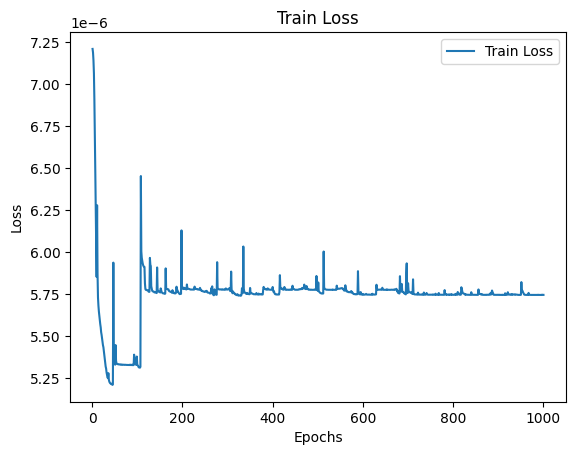

In [115]:
train_loss1 = history1.history['loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss1, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.legend()
plt.show()

In [116]:
# Calcule o RMSE entre os dados originais e reconstruídos
rmse = (np.mean(np.square(X_train - reconstructed_data)))**0.5
print(f"RMSE: {rmse}")

RMSE: TFIDF express    0.002618
TFIDF sort       0.001424
TFIDF dream      0.002072
TFIDF similar    0.001176
TFIDF nice       0.002146
                   ...   
TFIDF museum     0.001947
TFIDF regular    0.001141
TFIDF factor     0.001398
TFIDF field      0.001969
TFIDF born       0.002414
Length: 250, dtype: float64


c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



### Utilizando menor dimensionalidade para segmentar os tipos de textos

Neste exemplo, vamos reduzir as 250 colunas em 16 colunas, usando a 4a camada da rede neural treinada.

In [117]:
from tensorflow.keras.models import Model

# Crie um novo modelo que inclui apenas as camadas até encoded_16
model_encoded_16 = Model(inputs=autoencoder.input, outputs=autoencoder.layers[4].output)

# Use o modelo para obter as saídas da camada encoded_16
encoded_16_outputs = model_encoded_16.predict(X_train)


type(encoded_16_outputs)

305/305 [==============================] - 0s 744us/step


numpy.ndarray

### K-means & AutoEncoder

In [118]:
from sklearn.cluster import KMeans

In [119]:
# Crie um modelo K-Means com 4 clusters
# Os clusters são as segmentacoes: 'Humor', 'Leadership', 'Travel', 'Parenting'
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Treine o modelo K-Means nas saídas encoded_16_outputs
kmeans_model.fit(encoded_16_outputs)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=0)

In [120]:
# Obtenha os rótulos dos clusters para cada amostra
cluster_labels = kmeans_model.labels_

len(cluster_labels)

9732

In [121]:
df_modelagem_exemplo['Clusters'] = cluster_labels

cols_mdl = []
for tag in ['Humor', 'Leadership', 'Travel', 'Parenting']:
  aux = []
  for i in range(0,len(df_modelagem_exemplo)):
    if tag in df_modelagem_exemplo['tags'][i]:
      aux.append(1)
    else:
      aux.append(0)
  colname = tag+'_Dummy'
  cols_mdl.append(colname)
  df_modelagem_exemplo[colname] = aux

In [122]:
df_modelagem_exemplo.groupby(['Clusters'])[cols_mdl].agg(['sum'])

,Humor_Dummy,Leadership_Dummy,Travel_Dummy,Parenting_Dummy
,sum,sum,sum,sum
Clusters,,,,
0,2321,2892,2585,2062
1,40,0,0,1
2,39,0,4,1
3,1,0,0,0


Neste exemplo, o método k-means não separou os textos, conforme os tipos.

## Testando PCA

In [123]:
from sklearn.decomposition import PCA

In [124]:
# Crie uma instância do PCA
pca = PCA(n_components=16)  # Número de componentes desejados após a redução

# Ajuste o PCA aos dados de treinamento
pca.fit(X_train)

# Transforme os dados de treinamento para as novas dimensões
X_train_pca = pca.transform(X_train)

In [125]:
X_train_pca

array([[-1.87856966e-03, -8.65527597e-04, -4.40657081e-04, ...,
        -4.34242257e-04,  2.20111578e-04, -8.70554774e-04],
       [-1.81852897e-03, -7.96477644e-04, -4.07039835e-04, ...,
        -4.42901715e-04, -1.29208111e-04, -4.39272569e-04],
       [-2.26198648e-03, -1.53426129e-03, -1.00211016e-03, ...,
         5.22121487e-04, -6.67013385e-04, -4.39043266e-04],
       ...,
       [-1.80936962e-03, -7.75652991e-04, -3.95299269e-04, ...,
        -4.47094459e-04,  2.64150111e-05, -5.34384754e-04],
       [-1.49076189e-03, -5.45955772e-04, -3.82912204e-04, ...,
        -9.66239919e-05, -2.99438202e-03,  2.87616156e-03],
       [-1.81742107e-03, -7.89037501e-04, -3.58217896e-04, ...,
        -1.62060781e-05, -5.10811853e-04,  1.32950925e-04]])

### K-means & PCA

In [126]:
# Crie um modelo K-Means com 4 clusters
# Os clusters são as segmentacoes: 'Humor', 'Leadership', 'Travel', 'Parenting'
kmeans_model_pca = KMeans(n_clusters=4, random_state=0)

# Treine o modelo K-Means nas saídas encoded_16_outputs
kmeans_model_pca.fit(X_train_pca)

# Obtenha os rótulos dos clusters para cada amostra
cluster_labels2 = kmeans_model_pca.labels_

len(cluster_labels2)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



9732

In [127]:
df_modelagem_exemplo['Clusters_PCA'] = cluster_labels2

df_modelagem_exemplo.groupby(['Clusters_PCA'])[cols_mdl].agg(['sum'])

,Humor_Dummy,Leadership_Dummy,Travel_Dummy,Parenting_Dummy
,sum,sum,sum,sum
Clusters_PCA,,,,
0,2332,2890,2587,2063
1,40,0,0,1
2,29,0,1,0
3,0,2,1,0


### Random Forest e AutoEncoder

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
classes = []
for i in range(0,len(df_modelagem_exemplo)):
  if df_modelagem_exemplo['Humor_Dummy'][i] == 1:
    classes.append(1)
  elif df_modelagem_exemplo['Leadership_Dummy'][i] == 1:
    classes.append(2)
  elif df_modelagem_exemplo['Travel_Dummy'][i] == 1:
    classes.append(3)
  elif df_modelagem_exemplo['Parenting_Dummy'][i] == 1:
    classes.append(4)
  else:
    print("ver indice: ",i)


In [130]:
# Divida os dados em conjuntos de treinamento e teste
X_train2, X_test, y_train, y_test = train_test_split(X_train, classes, test_size=0.2, random_state=42)

# Crie um modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=50)

# Treine o modelo
random_forest_model.fit(X_train2, y_train)

# Faça previsões no conjunto de teste
predictions = random_forest_model.predict(X_test)

# Calcule a acurácia das previsões
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

Acurácia: 0.5932203389830508


In [131]:
X_train3 = X_test.copy()
X_train3['y'] = y_test
X_train3['predictions'] = predictions

In [132]:
table = X_train3.groupby(['predictions', 'y']).size().unstack(fill_value=0)
table

y,1,2,3,4
predictions,,,,
1,292,71,89,81
2,64,470,99,108
3,86,42,269,45
4,62,20,25,124


In [133]:
table2 = table/table.sum()
table2

y,1,2,3,4
predictions,,,,
1,0.579365,0.117745,0.184647,0.226257
2,0.126984,0.779436,0.205394,0.301676
3,0.170635,0.069652,0.558091,0.125698
4,0.123016,0.033167,0.051867,0.346369


### Conclusao

Percebemos que com algoritmo supervisionado, os temas 1, 2 e 3 foram previstos com maior facilidade, usando apenas 16 variáveis explicativas.

Já o algoritmo não supervisionado não foi capaz de realizar a separação como o esperado.

Vale ressaltar, que a maior frequência de preditos foi do respectivo tema corretamente. Em outras palavras, para o tema 4 cuja assertividade foi menor, 35% dos casos foram previstos para o tema 4.

# Exercicios

1. Realize um teste usando as camadas encoded_128, encoded_64 e encoded_32 da rede neural já treinada. Avalie se o método K-means e Random Forest seriam capazes de acertar mais as predições, usando os mesmos parâmetros dos exemplos.

Em outras palavras,
3 outputs de rede neural * 2 algoritmos = **6 modelos diferentes**.

2. Baseado na prática que teve maior assertividade na etapa anterior, treine uma rede neural com a mesma arquitetura para os demais temas.

Sugestão: utilize o código abaixo:



```
df_modelagem_atividade = df.loc[((df['Humor'] != 1) & (df['Leadership'] != 1) & (df['Travel'] != 1) & (df['Parenting'] != 1)), ['title', 'text', 'url', 'authors', 'timestamp', 'tags']]
```
**Lembrete:** é preciso realizar toda a etapa de tratamento e transformação nos dados. Talvez seja mais simples criar uma cópia deste notebook e alterar apenas a base de modelagem.




In [134]:
df_modelagem_atividade = df.loc[((df['Humor'] != 1) & (df['Leadership'] != 1) & (df['Travel'] != 1) & (df['Parenting'] != 1)), ['title', 'text', 'url', 'authors', 'timestamp', 'tags']].reset_index(drop=True)
df_modelagem_atividade.tail()

,title,text,url,authors,timestamp,tags
182629,Why do you need a cleaning service?,What could be more important than having a tid...,https://medium.com/@ozneedcleaningau/why-do-yo...,[],2021-11-16 08:17:08.950000+00:00,"['Cleaning', 'Cleaning Services', 'Cleaning Co..."
182630,Daily cleaning and maintenance of bedding,Daily cleaning and maintenance of bedding\n\nW...,https://medium.com/@a198blwt/daily-cleaning-an...,[],2021-11-16 05:27:05.359000+00:00,"['Bedding', 'Cleaning', 'Maintain']"
182631,Beneficial Advice on Bond Cleaning!,The most important chore at the end is bond cl...,https://medium.com/@princegohil/beneficial-adv...,['Prince Shrawan'],2021-11-26 08:20:27.660000+00:00,"['Cleaning', 'End Of Lease Cleaning', 'Cleaners']"
182632,How I Learned Romanian in 37 Easy Steps,How I Learned Romanian in 37 Easy Steps\n\nHey...,https://medium.com/@lifeinromania/how-i-learne...,['Sam Ursu'],2017-11-27 08:09:19.025000+00:00,"['Romania', 'Language Learning', 'Storyofmylife']"
182633,Trying Pimsleur Cantonese in Hong Kong,"Over the past few years, I’ve heard a number o...",https://medium.com/toshuo/trying-pimsleur-cant...,[],2017-06-15 02:24:35.659000+00:00,"['Hong Kong', 'Cantonese', 'Language Learning'..."


# Exercicio 1

In [135]:
# Usando as camadas do autoencoder já treinadas para obter as saídas da camada encoded_16

model_encoded_128 = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

model_encoded_64 = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)

model_encoded_32 = Model(inputs=autoencoder.input, outputs=autoencoder.layers[3].output)


encoded_128_outputs = model_encoded_128.predict(X_train)

encoded_64_outputs = model_encoded_64.predict(X_train)

encoded_32_outputs = model_encoded_32.predict(X_train)



131/305 [===========>..................] - ETA: 0s

305/305 [==============================] - 0s 739us/step


In [136]:
# Printando o shape de cada saída
print(f"encoded_128_outputs: {encoded_128_outputs.shape}")
print(f"encoded_64_outputs: {encoded_64_outputs.shape}")
print(f"encoded_32_outputs: {encoded_32_outputs.shape}")

encoded_128_outputs: (9732, 128)
encoded_64_outputs: (9732, 64)
encoded_32_outputs: (9732, 32)


In [137]:
# Crie um modelo K-Means com 4 clusters
# Os clusters são as segmentacoes: 'Humor', 'Leadership', 'Travel', 'Parenting'
kmeans_model_encoded_128 = KMeans(n_clusters=4, random_state=0)

kmeans_model_encoded_64 = KMeans(n_clusters=4, random_state=0)

kmeans_model_encoded_32 = KMeans(n_clusters=4, random_state=0)

# Treine o modelo K-Means nas saídas encoded_16_outputs
kmeans_model_encoded_128.fit(encoded_128_outputs)

kmeans_model_encoded_64.fit(encoded_64_outputs)

kmeans_model_encoded_32.fit(encoded_32_outputs)

# Obtenha os rótulos dos clusters para cada amostra
cluster_labels = kmeans_model_encoded_128.labels_

len(cluster_labels)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



9732

# Teste usando as camadas encoded_128

## método K-means

In [138]:
cluster_labels_encoded_128 = kmeans_model_encoded_128.labels_

df_modelagem_exemplo['Clusters'] = cluster_labels_encoded_128

cols_mdl = []
for tag in ['Humor', 'Leadership', 'Travel', 'Parenting']:
    aux = []
    for i in range(0,len(df_modelagem_exemplo)):
        if tag in df_modelagem_exemplo['tags'][i]:
            aux.append(1)
        else:
            aux.append(0)
    colname = tag+'_Dummy'
    cols_mdl.append(colname)
    df_modelagem_exemplo[colname] = aux



In [139]:
df_modelagem_exemplo.groupby(['Clusters'])[cols_mdl].agg(['sum'])

,Humor_Dummy,Leadership_Dummy,Travel_Dummy,Parenting_Dummy
,sum,sum,sum,sum
Clusters,,,,
0,38,0,4,1
1,40,0,0,1
2,28,0,0,0
3,2295,2892,2585,2062


## método Random Forest

In [140]:
classes = []

for i in range(0,len(df_modelagem_exemplo)):
    if df_modelagem_exemplo['Humor_Dummy'][i] == 1:
        classes.append(1)
    elif df_modelagem_exemplo['Leadership_Dummy'][i] == 1:
        classes.append(2)
    elif df_modelagem_exemplo['Travel_Dummy'][i] == 1:
        classes.append(3)
    elif df_modelagem_exemplo['Parenting_Dummy'][i] == 1:
        classes.append(4)
    else:
        print("ver indice: ",i)


In [141]:
X_train = model_encoded_128.predict(X_train)

# Divida os dados em conjuntos de treinamento e teste
X_train2, X_test, y_train, y_test = train_test_split(encoded_128_outputs, classes, test_size=0.2, random_state=42)

# Crie um modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=50)

# Treine o modelo
random_forest_model.fit(X_train2, y_train)

# Faça previsões no conjunto de teste
predictions = random_forest_model.predict(X_test)

# Calcule a acurácia das previsões
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

305/305 [==============================] - 0s 780us/step
Acurácia: 0.49357986646122237


In [142]:
X_train3 = pd.DataFrame(X_test.copy())
X_train3['y'] = y_test
X_train3['predictions'] = predictions

table = X_train3.groupby(['predictions', 'y']).size().unstack(fill_value=0)
table

y,1,2,3,4
predictions,,,,
1,178,40,28,40
2,169,470,176,192
3,146,86,271,84
4,11,7,7,42


In [143]:
table2 = table/table.sum()
table2

y,1,2,3,4
predictions,,,,
1,0.353175,0.066335,0.058091,0.111732
2,0.335317,0.779436,0.365145,0.536313
3,0.289683,0.142620,0.562241,0.234637
4,0.021825,0.011609,0.014523,0.117318


# Teste usando as camadas encoded_64

## método K-means

In [144]:
cluster_labels_encoded_64 = kmeans_model_encoded_64.labels_

df_modelagem_exemplo['Clusters'] = cluster_labels_encoded_64

cols_mdl = []
for tag in ['Humor', 'Leadership', 'Travel', 'Parenting']:
    aux = []
    for i in range(0,len(df_modelagem_exemplo)):
        if tag in df_modelagem_exemplo['tags'][i]:
            aux.append(1)
        else:
            aux.append(0)
    colname = tag+'_Dummy'
    cols_mdl.append(colname)
    df_modelagem_exemplo[colname] = aux



In [145]:
df_modelagem_exemplo.groupby(['Clusters'])[cols_mdl].agg(['sum'])

,Humor_Dummy,Leadership_Dummy,Travel_Dummy,Parenting_Dummy
,sum,sum,sum,sum
Clusters,,,,
0,39,0,4,1
1,40,0,0,1
2,2321,2892,2585,2062
3,1,0,0,0


## método Random Forest

In [146]:
classes = []

for i in range(0,len(df_modelagem_exemplo)):
    if df_modelagem_exemplo['Humor_Dummy'][i] == 1:
        classes.append(1)
    elif df_modelagem_exemplo['Leadership_Dummy'][i] == 1:
        classes.append(2)
    elif df_modelagem_exemplo['Travel_Dummy'][i] == 1:
        classes.append(3)
    elif df_modelagem_exemplo['Parenting_Dummy'][i] == 1:
        classes.append(4)
    else:
        print("ver indice: ",i)


In [150]:
X_train = model_encoded_64.predict(X_train)

# Divida os dados em conjuntos de treinamento e teste
X_train2, X_test, y_train, y_test = train_test_split(encoded_64_outputs, classes, test_size=0.2, random_state=42)

# Crie um modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=50)

# Treine o modelo
random_forest_model.fit(X_train2, y_train)

# Faça previsões no conjunto de teste
predictions = random_forest_model.predict(X_test)

# Calcule a acurácia das previsões
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

ValueError: in user code:

    File "c:\Python311\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Python311\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python311\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Python311\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_11" is incompatible with the layer: expected shape=(None, 250), found shape=(None, 128)


In [ ]:
X_train3 = pd.DataFrame(X_test)
X_train3['y'] = y_test
X_train3['predictions'] = predictions

table = X_train3.groupby(['predictions', 'y']).size().unstack(fill_value=0)
table

y,1,2,3,4
predictions,,,,
1,292,71,89,81
2,64,470,99,108
3,86,42,269,45
4,62,20,25,124


In [ ]:
table2 = table/table.sum()
table2

y,1,2,3,4
predictions,,,,
1,0.579365,0.117745,0.184647,0.226257
2,0.126984,0.779436,0.205394,0.301676
3,0.170635,0.069652,0.558091,0.125698
4,0.123016,0.033167,0.051867,0.346369


# Teste usando as camadas encoded_32

## método K-means

In [ ]:
cluster_labels_encoded_32 = kmeans_model_encoded_32.labels_

df_modelagem_exemplo['Clusters'] = cluster_labels_encoded_32

cols_mdl = []
for tag in ['Humor', 'Leadership', 'Travel', 'Parenting']:
    aux = []
    for i in range(0,len(df_modelagem_exemplo)):
        if tag in df_modelagem_exemplo['tags'][i]:
            aux.append(1)
        else:
            aux.append(0)
    colname = tag+'_Dummy'
    cols_mdl.append(colname)
    df_modelagem_exemplo[colname] = aux

In [ ]:
df_modelagem_exemplo.groupby(['Clusters'])[cols_mdl].agg(['sum'])

,Humor_Dummy,Leadership_Dummy,Travel_Dummy,Parenting_Dummy
,sum,sum,sum,sum
Clusters,,,,
0,2301,2892,2585,2062
1,40,0,0,1
2,26,0,0,0
3,34,0,4,1


## método Random Forest

In [ ]:
classes = []

for i in range(0,len(df_modelagem_exemplo)):
    if df_modelagem_exemplo['Humor_Dummy'][i] == 1:
        classes.append(1)
    elif df_modelagem_exemplo['Leadership_Dummy'][i] == 1:
        classes.append(2)
    elif df_modelagem_exemplo['Travel_Dummy'][i] == 1:
        classes.append(3)
    elif df_modelagem_exemplo['Parenting_Dummy'][i] == 1:
        classes.append(4)
    else:
        print("ver indice: ",i)


In [ ]:
X_train = model_encoded_32.predict(X_train)

# Divida os dados em conjuntos de treinamento e teste
X_train2, X_test, y_train, y_test = train_test_split(encoded_32_outputs, classes, test_size=0.2, random_state=42)

# Crie um modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=50)

# Treine o modelo
random_forest_model.fit(X_train2, y_train)

# Faça previsões no conjunto de teste
predictions = random_forest_model.predict(X_test)

# Calcule a acurácia das previsões
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

Acurácia: 0.5932203389830508


In [ ]:
X_train3 = pd.DataFrame(X_test)
X_train3['y'] = y_test
X_train3['predictions'] = predictions

table = X_train3.groupby(['predictions', 'y']).size().unstack(fill_value=0)
table

y,1,2,3,4
predictions,,,,
1,292,71,89,81
2,64,470,99,108
3,86,42,269,45
4,62,20,25,124


In [ ]:
table2 = table/table.sum()
table2

y,1,2,3,4
predictions,,,,
1,0.579365,0.117745,0.184647,0.226257
2,0.126984,0.779436,0.205394,0.301676
3,0.170635,0.069652,0.558091,0.125698
4,0.123016,0.033167,0.051867,0.346369


Valor da acurácia do professor: 0.5932203389830508